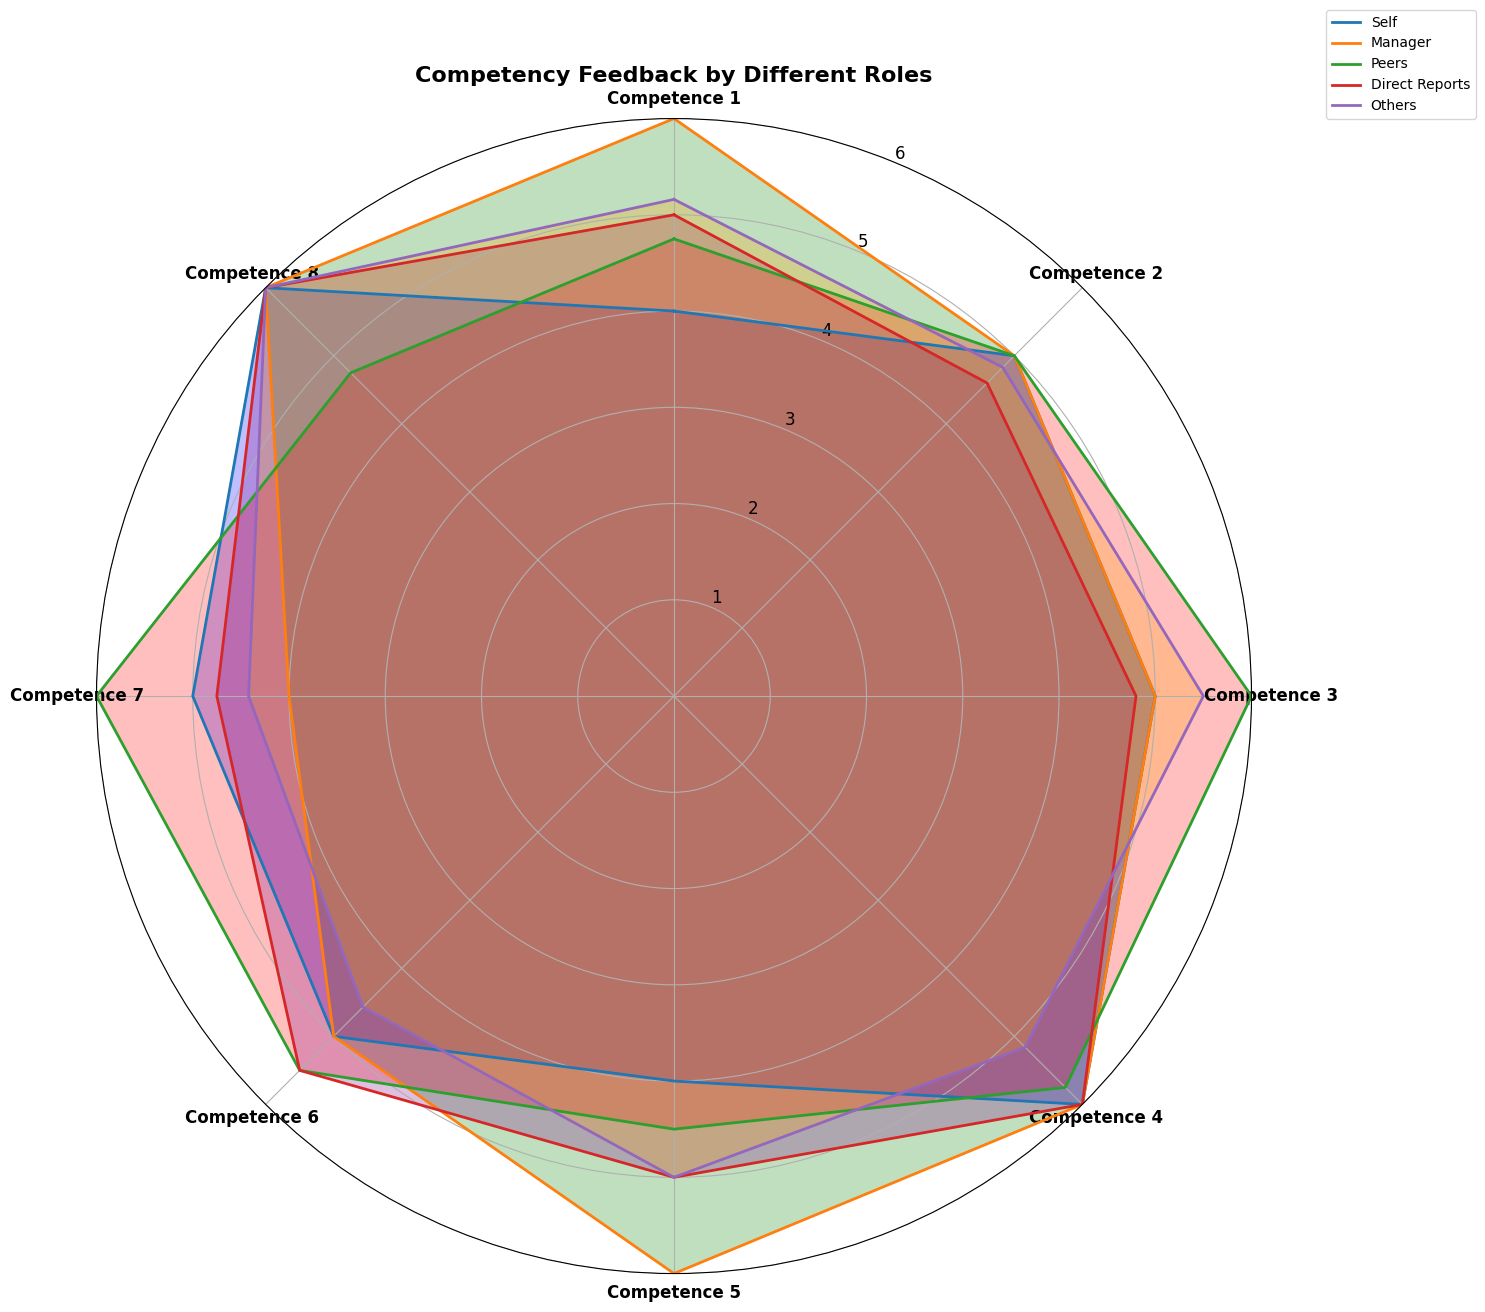

In [39]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Step 1: Load the data from the Excel file
df = pd.read_excel('data.xlsx')

# Step 2: Preparing the data for the radar chart
# Extracting the competencies and feedback roles
competencies = df['Competence'].tolist()  # Competency names (should be 8)
self = df['Self'].tolist()  # Self feedback scores
manager = df['Manager'].tolist()  # Manager feedback scores
peers = df['Peers'].tolist()  # Peers feedback scores
direct_reports = df['Direct Reports'].tolist()  # Direct Reports feedback scores
others = df['Others'].tolist()  # Others feedback scores

# Step 3: Set up the radar chart parameters
categories = competencies  # Categories are the competencies (8)
N = len(categories)  # Number of competencies (8)

# Angle for each category (divide 2pi by number of competencies)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()

# Ensure that the plot forms a circle
self += self[:1]
manager += manager[:1]
peers += peers[:1]
direct_reports += direct_reports[:1]
others += others[:1]
angles += angles[:1]

# Step 4: Create the radar chart
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(polar=True))

# Plotting each feedback role on the radar chart
ax.plot(angles, self, linewidth=2, linestyle='solid', label='Self')
ax.plot(angles, manager, linewidth=2, linestyle='solid', label='Manager')
ax.plot(angles, peers, linewidth=2, linestyle='solid', label='Peers')
ax.plot(angles, direct_reports, linewidth=2, linestyle='solid', label='Direct Reports')
ax.plot(angles, others, linewidth=2, linestyle='solid', label='Others')

# Filling the area under the lines (optional)
ax.fill(angles, self, color='blue', alpha=0.25)
ax.fill(angles, manager, color='green', alpha=0.25)
ax.fill(angles, peers, color='red', alpha=0.25)
ax.fill(angles, direct_reports, color='purple', alpha=0.25)
ax.fill(angles, others, color='orange', alpha=0.25)

# Step 5: Customizing the radar chart
# Setting scale (from 1 to 6)
ax.set_yticks([1, 2, 3, 4, 5, 6])  # Set radial ticks (scale from 1 to 6)
ax.set_yticklabels([1, 2, 3, 4, 5, 6], fontsize=12)  # Set labels for ticks
ax.set_ylim(0, 6)  # Ensure the scale goes from 0 to 6

# Rotate the radar chart
# To rotate the chart, change the starting point angle. 
# For example, setting it to pi/4 will rotate the chart 45 degrees counterclockwise.
# Change the value to rotate as needed.
ax.set_theta_offset(pi / 2)  # This rotates the chart by 90 degrees counterclockwise (so 12 o'clock is now at the top)

# Set the direction of the labels (clockwise or counterclockwise)
# Set to -1 for clockwise or 1 for counterclockwise
ax.set_theta_direction(-1)  # Set this to 1 for clockwise or -1 for counterclockwise

ax.set_xticks(angles[:-1])  # Remove last duplicate angle
ax.set_xticklabels(categories, fontsize=12, fontweight='bold')  # Competency names
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1), fontsize=10)

# Step 6: Display the radar chart
plt.title('Competency Feedback by Different Roles', size=16, fontweight='bold')
plt.show()
